In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pygal

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install CairoSVG

Note: you may need to restart the kernel to use updated packages.


In [49]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pygal
# may need to install CairoSVG with pygal

TypeError: entry_points() got an unexpected keyword argument 'group'

In [50]:
# data
categories = ['Fuel Economy', 'Reliability', 'Comfort', 'Design', 'Repair Costs', 'Fuel Economy']

vehicle1 = [5,4,4,2,3]
# ***** to close the radar shape add the first list element to the end of the list or concatenate *****
vehicle1 = np.concatenate((vehicle1,[vehicle1[0]]))

vehicle2 = [3,4,5,5,4]
vehicle2 = np.concatenate((vehicle2,[vehicle2[0]]))

vehicle3 = [4,4,3,4,5]
vehicle3 = np.concatenate((vehicle3,[vehicle3[0]]))

In [51]:
vehicle3

array([4, 4, 3, 4, 5, 4])

In [52]:
# calculate evenly-spaced angle coordinates
# use radians for polar plot with 2*np.pi
label_placement = np.linspace(start=0, stop=2*np.pi, num=len(vehicle1))
label_placement

array([0.        , 1.25663706, 2.51327412, 3.76991118, 5.02654825,
       6.28318531])

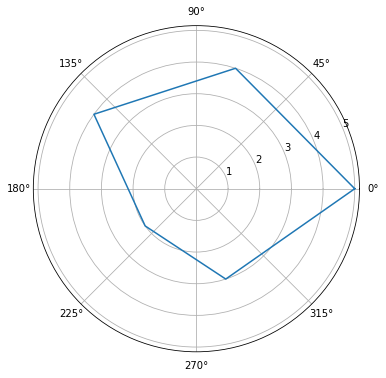

In [53]:
# create matplotlib figure and polar plot with labels, title, and legend
plt.figure(figsize=(6,6))
plt.subplot(polar=True)
plt.plot(label_placement, vehicle1)

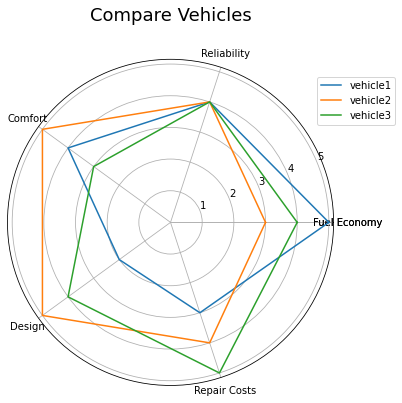

In [54]:
# create matplotlib figure and polar plot with labels, title, and legend
plt.figure(figsize=(6,6))
plt.subplot(polar=True)
plt.plot(label_placement, vehicle1)
# plt.fill(label_placement, vehicle1, 'blue', alpha=0.1)
plt.plot(label_placement, vehicle2)
plt.plot(label_placement, vehicle3)
# use thetagrids to place labels at the specified angles using degrees
lines, labels = plt.thetagrids(np.degrees(label_placement), labels=categories)
plt.title('Compare Vehicles', y=1.1, fontdict={'fontsize': 18})
plt.legend(labels=['vehicle1','vehicle2', 'vehicle3'],loc=(0.95, 0.8));

In [23]:
df

,group,attribute1,attribute2,attribute3
0,Group 1,3,4,5
1,Group 2,4,5,6
2,Group 3,5,6,7


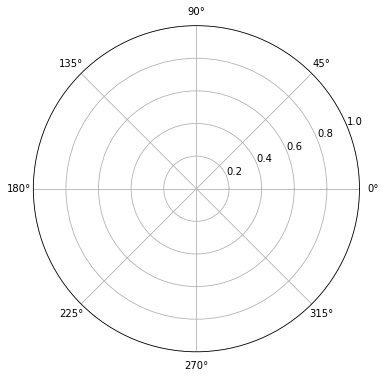

In [27]:
# กำหนดขนาดของกราฟ
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
# กำหนดจำนวนของแกน
categories = ['attribute1', 'attribute2', 'attribute3']
N = len(categories)

In [34]:
values_group1 = df.loc[0].drop('group').values.flatten().tolist()
values_group1

[3, 4, 5]

In [38]:
# กำหนดค่าสำหรับแต่ละกลุ่ม
values_group1 = df.loc[0].drop('group').values.flatten().tolist()
values_group2 = df.loc[1].drop('group').values.flatten().tolist()
values_group3 = df.loc[2].drop('group').values.flatten().tolist()
# สร้างเส้นที่เชื่อมกันระหว่างจุด
angles = [n / float(N) * 2 * np.pi for n in range(N)]
values_group1 += values_group1[:1]
values_group2 += values_group2[:1]
values_group3 += values_group3[:1]
angles += angles[:1]

In [41]:
values_group1

[3, 4, 5, 3]

In [42]:
# สร้าง Radar Chart
ax.plot(angles, values_group1, linewidth=1, linestyle='solid', label='Group 1')
ax.fill(angles, values_group1, 'b', alpha=0.1)

ax.plot(angles, values_group2, linewidth=1, linestyle='solid', label='Group 2')
ax.fill(angles, values_group2, 'r', alpha=0.1)

ax.plot(angles, values_group3, linewidth=1, linestyle='solid', label='Group 3')
ax.fill(angles, values_group3, 'g', alpha=0.1)

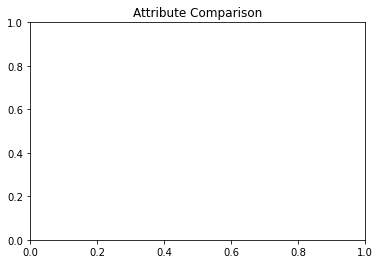

In [31]:
# กำหนดข้อความบนกราฟ
plt.title('Attribute Comparison')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.show()